In [1]:
# As usual, a bit of setup
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """
    returns relative error
    """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

run the following from the cs231n directory and try again:
python setup.py build_ext --inplace
You may also need to restart your iPython kernel


In [2]:
# Load the preprocessed CIFAR10 data
data = get_CIFAR10_data()
for k, v in list(data.items()):
    print(("%s: " % k, v.shape))

('y_test: ', (1000,))
('X_val: ', (1000, 3, 32, 32))
('X_test: ', (1000, 3, 32, 32))
('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('y_val: ', (1000,))


### Affine layer: forward

In [18]:
# Test the affine forward function
num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error should be around 1e-9
print('Testing affine forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine forward function:
difference:  9.7698500479884e-10


In [9]:
input_shape = (4, 5, 6)
input_size = num_inputs * np.prod(input_shape)

In [10]:
num_inputs = 2

In [11]:
x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)

In [14]:
x.shape

(2, 4, 5, 6)

In [15]:
x.shape[0]

2

In [17]:
x.reshape(2, -1).shape

(2, 120)

### Affine layer: backward

In [19]:
# Test the affine backward function
np.random.seed(231)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

# print("x: ", x)

In [21]:
dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

print("Testing affine backward function:")
print("dx error: ", rel_error(dx_num, dx))
print("dw_error: ", rel_error(dw_num, dw))
print("db error: ", rel_error(db_num, db))

Testing affine backward function:
dx error:  1.0908199508708189e-10
dw_error:  2.1752635504596857e-10
db error:  7.736978834487815e-12


### ReLU layer: forward

In [22]:
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
# correct_out = np.array([[]])
print(out)

[[0.         0.         0.         0.        ]
 [0.         0.         0.04545455 0.13636364]
 [0.22727273 0.31818182 0.40909091 0.5       ]]


### ReLY layer: backward

In [31]:
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)
print ("cache: ", cache)



cache:  [[ 0.41794341  1.39710028 -1.78590431 -0.70882773 -0.07472532 -0.77501677
  -0.1497979   1.86172902 -1.4255293  -0.3763567 ]
 [-0.34227539  0.29490764 -0.83732373  0.95218767  1.32931659  0.52465245
  -0.14809998  0.88953195  0.12444653  0.99109251]
 [ 0.03514666  0.26207083  0.14320173  0.90101716  0.23185863 -0.79725793
   0.12001014 -0.65679608  0.26917456  0.333667  ]
 [ 0.27423503  0.76215717 -0.69550058  0.29214712 -0.38489942  0.1228747
  -1.42904497  0.70286283 -0.85850947 -1.14042979]
 [-1.58535997 -0.01530138 -0.32156083  0.56834936 -0.19961722  1.27286625
   1.27292534  1.58102968 -1.75626715  0.9217743 ]
 [-0.6753054  -1.43443616  0.47021125  0.03196734  0.04448574  0.47824879
  -2.51335181 -1.15740245 -0.70470413 -1.04978879]
 [-1.90795589  0.49258765  0.83736166 -1.4288134  -0.18982427 -1.14094943
  -2.12570755 -0.41354791  0.44148975  0.16411113]
 [-0.65505065 -0.30212765 -0.25704466 -0.12841368  0.26338593  0.1672181
  -0.30871951 -1.26754462 -0.22319022 -0.8299

In [32]:
print("dx: ", dx)

dx:  [[-0.22557183 -1.1928829  -0.          0.          0.         -0.
   0.         -0.35229594  0.         -0.        ]
 [-0.         -0.84338097 -0.          0.85434757 -0.90377338 -1.0525584
  -0.          0.18083726 -0.4125417   1.22913948]
 [-0.97791748 -0.63978524 -0.00880963  0.36213294  0.35148162 -0.
  -0.84272962  0.         -2.39079478  0.88256212]
 [-1.12082008  0.12416778 -0.         -1.62701704 -0.          2.00862337
   0.         -0.86943856  0.         -0.        ]
 [-0.         -0.         -0.         -0.67498124  0.         -0.11970425
   0.59700586 -2.0399063  -0.         -1.61700346]
 [-0.          0.          1.97009461 -0.81967191  0.42367521 -1.83570698
   0.          0.          0.          0.        ]
 [ 0.          2.13935149 -0.77429891 -0.         -0.         -0.
  -0.         -0.          0.59190367 -0.56016357]
 [ 0.         -0.         -0.          0.          0.37364743 -0.26051388
   0.         -0.         -0.          0.        ]
 [-0.         -0.   

In [33]:
print("dx_num: ", dx_num)

dx_num:  [[-0.22557183 -1.1928829   0.          0.          0.          0.
   0.         -0.35229594  0.          0.        ]
 [ 0.         -0.84338097  0.          0.85434757 -0.90377338 -1.0525584
   0.          0.18083726 -0.4125417   1.22913948]
 [-0.97791748 -0.63978524 -0.00880963  0.36213294  0.35148162  0.
  -0.84272962  0.         -2.39079478  0.88256212]
 [-1.12082008  0.12416778  0.         -1.62701704  0.          2.00862337
   0.         -0.86943856  0.          0.        ]
 [ 0.          0.          0.         -0.67498124  0.         -0.11970425
   0.59700586 -2.0399063   0.         -1.61700346]
 [ 0.          0.          1.97009461 -0.81967191  0.42367521 -1.83570698
   0.          0.          0.          0.        ]
 [ 0.          2.13935149 -0.77429891  0.          0.          0.
   0.          0.          0.59190367 -0.56016357]
 [ 0.          0.          0.          0.          0.37364743 -0.26051388
   0.          0.          0.          0.        ]
 [ 0.          0

### Sandwich layers

In [24]:
from cs231n.layer_utils import affine_relu_forward, affine_relu_backward
np.random.seed(231)
x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

In [25]:
out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

In [26]:
dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

In [27]:
print("Testing affine relu forward: ")
print("dx error: ", rel_error(dx_num, dx))
print("dw error: ", rel_error(dw_num, dw))
print("db error: ", rel_error(db_num, db))

Testing affine relu forward: 
dx error:  6.395535042049294e-11
dw error:  8.162011105764925e-11
db error:  7.826724021458994e-12


In [28]:
x = 2

In [29]:
dx[x <= 0] = 0

In [30]:
dx

array([[[ 1.80622993, -1.30838532, -4.89618025,  0.73040886],
        [-0.23507179, -1.46048016, -2.57315203, -3.691443  ],
        [-1.71573295, -2.04496664, -1.54429804,  0.25099462]],

       [[ 1.18194977,  3.46684392, -4.6616882 ,  4.52081303],
        [ 6.29267365,  0.91510578,  1.23975253,  1.23033615],
        [ 0.2245295 ,  1.77601743,  5.43273975, -3.06160657]]])

In [34]:
x[np.arange(2), 2]

array([-1.78590431, -0.83732373])

In [36]:
x

array([[ 0.41794341,  1.39710028, -1.78590431, -0.70882773, -0.07472532,
        -0.77501677, -0.1497979 ,  1.86172902, -1.4255293 , -0.3763567 ],
       [-0.34227539,  0.29490764, -0.83732373,  0.95218767,  1.32931659,
         0.52465245, -0.14809998,  0.88953195,  0.12444653,  0.99109251],
       [ 0.03514666,  0.26207083,  0.14320173,  0.90101716,  0.23185863,
        -0.79725793,  0.12001014, -0.65679608,  0.26917456,  0.333667  ],
       [ 0.27423503,  0.76215717, -0.69550058,  0.29214712, -0.38489942,
         0.1228747 , -1.42904497,  0.70286283, -0.85850947, -1.14042979],
       [-1.58535997, -0.01530138, -0.32156083,  0.56834936, -0.19961722,
         1.27286625,  1.27292534,  1.58102968, -1.75626715,  0.9217743 ],
       [-0.6753054 , -1.43443616,  0.47021125,  0.03196734,  0.04448574,
         0.47824879, -2.51335181, -1.15740245, -0.70470413, -1.04978879],
       [-1.90795589,  0.49258765,  0.83736166, -1.4288134 , -0.18982427,
        -1.14094943, -2.12570755, -0.41354791

In [35]:
np.arange(2)

array([0, 1])

### Loss layers: Softmax and SVM

In [38]:
np.random.seed(231)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

In [40]:
x.shape

(50, 10)

In [41]:
y.shape

(50,)

In [42]:
y

array([2, 5, 0, 6, 5, 5, 0, 8, 8, 9, 4, 0, 0, 3, 1, 2, 8, 5, 8, 7, 4, 9,
       5, 1, 5, 7, 0, 0, 7, 0, 9, 8, 5, 9, 3, 7, 7, 9, 7, 3, 7, 3, 3, 3,
       8, 0, 5, 9, 5, 2])

In [43]:
correct_class_scores = x[np.arange(50), y]

In [45]:
correct_class_scores.shape

(50,)

In [47]:
correct_class_scores[:, np.newaxis].shape

(50, 1)

In [48]:
x - correct_class_scores[:, np.newaxis]

array([[ 2.20384772e-03,  3.18300459e-03,  0.00000000e+00,
         1.07707657e-03,  1.71117899e-03,  1.01088754e-03,
         1.63610641e-03,  3.64763333e-03,  3.60375009e-04,
         1.40954761e-03],
       [-8.66927844e-04, -2.29744817e-04, -1.36197618e-03,
         4.27535216e-04,  8.04664138e-04,  0.00000000e+00,
        -6.72752438e-04,  3.64879495e-04, -4.00205926e-04,
         4.66440059e-04],
       [ 0.00000000e+00,  2.26924167e-04,  1.08055064e-04,
         8.65870495e-04,  1.96711967e-04, -8.32404589e-04,
         8.48634769e-05, -6.91942741e-04,  2.34027894e-04,
         2.98520338e-04],
       [ 1.70327999e-03,  2.19120214e-03,  7.33544383e-04,
         1.72119209e-03,  1.04414554e-03,  1.55191967e-03,
         0.00000000e+00,  2.13190780e-03,  5.70535495e-04,
         2.88615171e-04],
       [-2.85822622e-03, -1.28816763e-03, -1.59442708e-03,
        -7.04516890e-04, -1.47248347e-03,  0.00000000e+00,
         5.90935960e-08,  3.08163435e-04, -3.02913340e-03,
        -3.

In [49]:
dx_num = eval_numerical_gradient(lambda x: svm_loss(x, y)[0], x, verbose=False)
loss, dx = svm_loss(x, y)

In [50]:
print("Testing svm_loss:")
print("loss: ", loss)
print("dx error: ", rel_error(dx_num, dx))

Testing svm_loss:
loss:  8.999602749096233
dx error:  1.4021566006651672e-09


In [51]:
dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

In [52]:
print("Testing softmax loss:")
print("loss: ", loss)
print("dx error: ", rel_error(dx_num, dx))

Testing softmax loss:
loss:  2.302545844500738
dx error:  9.384673161989355e-09


### Two - layer network

In [53]:
np.random.seed(231)
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size = N)

std = 1e-3

In [54]:
model = TwoLayerNet(input_dim = D, hidden_dim=H, num_classes=C, weight_scale=std)

In [55]:
print("Testing initialization ... ")
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']

Testing initialization ... 


In [56]:
assert W1_std < std / 10, "First layer weights do not seen right"
assert np.all(b1 == 0), "First layer biases do not seem right"
assert W2_std < std / 10, "Second layer weights do not seem right"
assert np.all(b2 == 0), 'Second layer biases do not seen right"'

In [57]:
model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)

In [58]:
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.loss(X)
correct_scores = np.asarray([[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])

In [59]:
scores_diff = np.abs(scores - correct_scores).sum()

In [62]:
assert scores_diff < 1e-6, "Problem with test-time forward pass"

### Solver

In [63]:
model = TwoLayerNet()
solver = Solver(model, data, update_rule = 'sgd', optim_config = {
    'learning_rate': 1e-3,
},
               lr_decay = 0.95,
               num_epochs=10,
               batch_size = 236,
               print_every=100)da

In [64]:
solver.train()

(Iteration 1 / 2070) loss: 2.305961
(Epoch 0 / 10) train acc: 0.113000; val_acc: 0.084000
(Iteration 101 / 2070) loss: 1.782752
(Iteration 201 / 2070) loss: 1.660997
(Epoch 1 / 10) train acc: 0.411000; val_acc: 0.413000
(Iteration 301 / 2070) loss: 1.623456
(Iteration 401 / 2070) loss: 1.580220
(Epoch 2 / 10) train acc: 0.485000; val_acc: 0.455000
(Iteration 501 / 2070) loss: 1.516204
(Iteration 601 / 2070) loss: 1.451538
(Epoch 3 / 10) train acc: 0.488000; val_acc: 0.468000
(Iteration 701 / 2070) loss: 1.622765
(Iteration 801 / 2070) loss: 1.488118
(Epoch 4 / 10) train acc: 0.514000; val_acc: 0.491000
(Iteration 901 / 2070) loss: 1.405215
(Iteration 1001 / 2070) loss: 1.423761
(Epoch 5 / 10) train acc: 0.505000; val_acc: 0.484000
(Iteration 1101 / 2070) loss: 1.345751
(Iteration 1201 / 2070) loss: 1.259718
(Epoch 6 / 10) train acc: 0.585000; val_acc: 0.499000
(Iteration 1301 / 2070) loss: 1.333484
(Iteration 1401 / 2070) loss: 1.344973
(Epoch 7 / 10) train acc: 0.581000; val_acc: 0.50

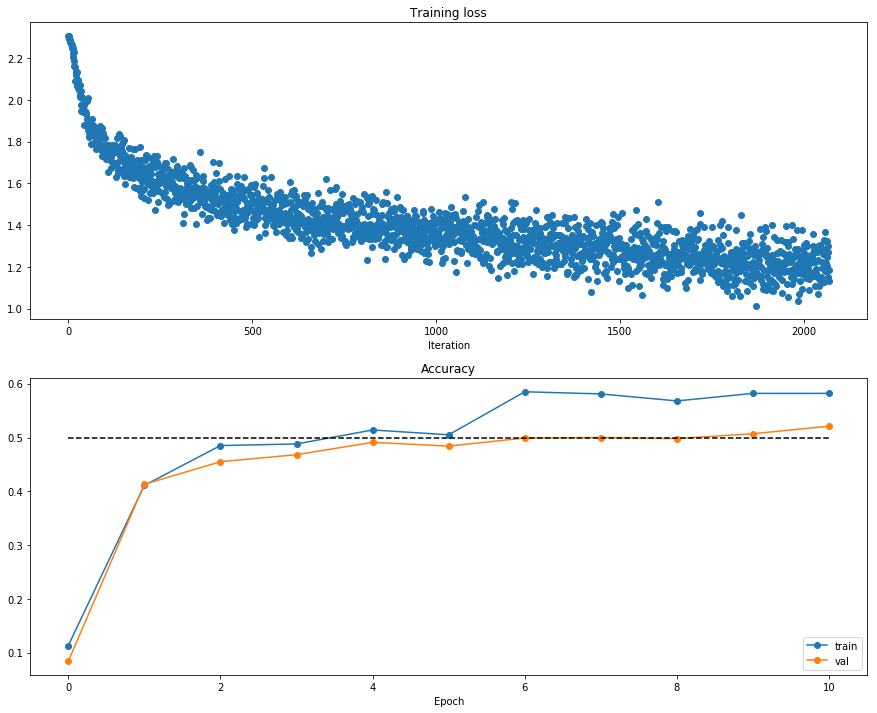

In [65]:
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

In [68]:
input_dim = 3 * 32 * 32
hidden_dims = [100, 100]
num_classes = 10
net_dims = [input_dim] + hidden_dims + [num_classes]

### Multilayer network

In [69]:
np.random.seed(251)

[autoreload of cs231n.classifiers.fc_net failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.5/dist-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/usr/lib/python3.5/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.5/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 626, in _exec
  File "<frozen importlib._bootstrap_external>", line 661, in exec_module
  File "<frozen importlib._bootstrap_external>", line 767, in get_code
  File "<frozen importlib._bootstrap_external>", line 727, in source_to_code
  File "<frozen importlib._bootstrap>", line 222, in _call_with_frames_removed
  File "/home/damvantai/Dropbox/source/courses/CS231n Convolutional Neural Ne

In [70]:
N, D, H1, H2, C = 2, 15, 20, 30, 10

In [71]:
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

In [72]:
for reg in [0, 3.14]:
    print("Running check with reg = ", reg)
    model = FullyConnectedNet([H1, H2], input_dim = D, num_classes = C, reg = reg, weight_scale = 5e-2, dtype=np.float64)
    
    loss, grads = model.loss(X, y)
    print('Initial loss: ', loss)
    
    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Running check with reg =  0
Initial loss:  2.307941433441618
W1 relative error: 4.18e-07
W2 relative error: 6.68e-07
W3 relative error: 3.33e-07
b1 relative error: 2.57e-08
b2 relative error: 7.53e-09
b3 relative error: 6.71e-11
Running check with reg =  3.14
Initial loss:  6.765122333792326
W1 relative error: 3.88e-08
W2 relative error: 3.19e-08
W3 relative error: 9.70e-07
b1 relative error: 2.01e-08
b2 relative error: 1.06e-08
b3 relative error: 1.60e-10


In [97]:
num_train = 50
small_data = {
    'X_train': data['X_train'][:num_train],
    'y_train': data['y_train'][:num_train],
    'X_val': data['X_val'],
    'y_val': data['y_val'],
}

In [98]:
weight_scale = 1e-2
learning_rate = 1e-2
model = FullyConnectedNet([100, 100], weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data, print_every=10, num_epochs=20, batch_size=25, update_rule='sgd', optim_config={
    'learning_rate': learning_rate,
})

In [99]:
solver.train()

(Iteration 1 / 40) loss: 2.266089
(Epoch 0 / 20) train acc: 0.220000; val_acc: 0.102000
(Epoch 1 / 20) train acc: 0.360000; val_acc: 0.119000
(Epoch 2 / 20) train acc: 0.640000; val_acc: 0.139000
(Epoch 3 / 20) train acc: 0.560000; val_acc: 0.155000
(Epoch 4 / 20) train acc: 0.640000; val_acc: 0.155000
(Epoch 5 / 20) train acc: 0.700000; val_acc: 0.145000
(Iteration 11 / 40) loss: 1.129084
(Epoch 6 / 20) train acc: 0.740000; val_acc: 0.149000
(Epoch 7 / 20) train acc: 0.720000; val_acc: 0.175000
(Epoch 8 / 20) train acc: 0.880000; val_acc: 0.168000
(Epoch 9 / 20) train acc: 0.860000; val_acc: 0.166000
(Epoch 10 / 20) train acc: 0.880000; val_acc: 0.176000
(Iteration 21 / 40) loss: 0.548989
(Epoch 11 / 20) train acc: 0.920000; val_acc: 0.180000
(Epoch 12 / 20) train acc: 0.920000; val_acc: 0.185000
(Epoch 13 / 20) train acc: 0.980000; val_acc: 0.182000
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.186000
(Epoch 15 / 20) train acc: 1.000000; val_acc: 0.200000
(Iteration 31 / 40) loss: 

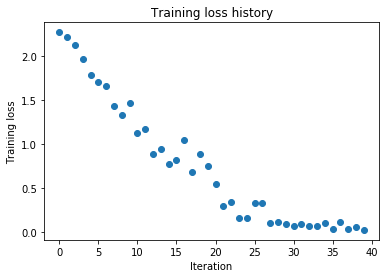

In [100]:
plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

In [107]:
# TODO
num_train = 50
small_data = {
    'X_train': data['X_train'][:num_train],
    'y_train': data['y_train'][:num_train],
    'X_val': data['X_val'],
    'y_val': data['y_val'],
}

In [108]:
learning_rate = 1e-2

In [109]:
weight_scale = 4e-2

In [110]:
model = FullyConnectedNet([100, 100, 100, 100, 100, 1000], weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data, print_every=10, num_epochs=20, batch_size=25, update_rule='sgd', optim_config={'learning_rate': learning_rate},)

In [111]:
solver.train()

(Iteration 1 / 40) loss: 2.484289
(Epoch 0 / 20) train acc: 0.100000; val_acc: 0.096000
(Epoch 1 / 20) train acc: 0.200000; val_acc: 0.095000
(Epoch 2 / 20) train acc: 0.260000; val_acc: 0.116000
(Epoch 3 / 20) train acc: 0.360000; val_acc: 0.134000
(Epoch 4 / 20) train acc: 0.280000; val_acc: 0.092000
(Epoch 5 / 20) train acc: 0.460000; val_acc: 0.123000
(Iteration 11 / 40) loss: 2.068410
(Epoch 6 / 20) train acc: 0.420000; val_acc: 0.136000
(Epoch 7 / 20) train acc: 0.380000; val_acc: 0.126000
(Epoch 8 / 20) train acc: 0.380000; val_acc: 0.140000
(Epoch 9 / 20) train acc: 0.400000; val_acc: 0.128000
(Epoch 10 / 20) train acc: 0.540000; val_acc: 0.125000
(Iteration 21 / 40) loss: 1.745247
(Epoch 11 / 20) train acc: 0.520000; val_acc: 0.132000
(Epoch 12 / 20) train acc: 0.660000; val_acc: 0.149000
(Epoch 13 / 20) train acc: 0.680000; val_acc: 0.140000
(Epoch 14 / 20) train acc: 0.540000; val_acc: 0.127000
(Epoch 15 / 20) train acc: 0.400000; val_acc: 0.144000
(Iteration 31 / 40) loss: 

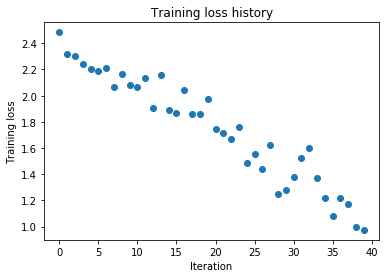

In [112]:
plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

### SGD + Momentum

In [113]:
from cs231n.optim import sgd_momentum

In [114]:
N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

In [115]:
config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config=config)

In [116]:
expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

In [117]:
print('next_w error: ', rel_error(next_w, expected_next_w))
print('velocity error: ', rel_error(expected_velocity, config['velocity']))

next_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


In [120]:
# Run the following to train a six-layer network with both SGD and SGD+momentum. You shold see the SGD + momentum converge faster
num_train = 4000
small_data = {
    'X_train': data['X_train'][:num_train],
    'y_train': data['y_train'][:num_train],
    'X_val': data['X_val'],
    'y_val': data['y_val'],
    
}

solvers = {}

In [122]:
for update_rule in ['sgd', 'sgd_momentum']:
    print('running with', update_rule)
    model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)
    
    solver = Solver(model, small_data, num_epochs=5, batch_size=100,
                   update_rule=update_rule,
                   optim_config={
                       'learning_rate': 1e-2,
                   },
                   verbose=True)
    solvers[update_rule] = solver
    solver.train()
    print()

running with sgd
(Iteration 1 / 200) loss: 2.800720
(Epoch 0 / 5) train acc: 0.123000; val_acc: 0.120000
(Iteration 11 / 200) loss: 2.292500
(Iteration 21 / 200) loss: 2.170988
(Iteration 31 / 200) loss: 2.202749
(Epoch 1 / 5) train acc: 0.273000; val_acc: 0.207000
(Iteration 41 / 200) loss: 2.029979
(Iteration 51 / 200) loss: 1.965616
(Iteration 61 / 200) loss: 1.938329
(Iteration 71 / 200) loss: 2.090305
(Epoch 2 / 5) train acc: 0.310000; val_acc: 0.257000
(Iteration 81 / 200) loss: 2.017271
(Iteration 91 / 200) loss: 1.821811
(Iteration 101 / 200) loss: 1.862985
(Iteration 111 / 200) loss: 1.768149
(Epoch 3 / 5) train acc: 0.357000; val_acc: 0.284000
(Iteration 121 / 200) loss: 1.725976
(Iteration 131 / 200) loss: 1.852572
(Iteration 141 / 200) loss: 1.615588
(Iteration 151 / 200) loss: 1.646488
(Epoch 4 / 5) train acc: 0.382000; val_acc: 0.316000
(Iteration 161 / 200) loss: 1.763442
(Iteration 171 / 200) loss: 1.640321
(Iteration 181 / 200) loss: 1.654349
(Iteration 191 / 200) loss

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


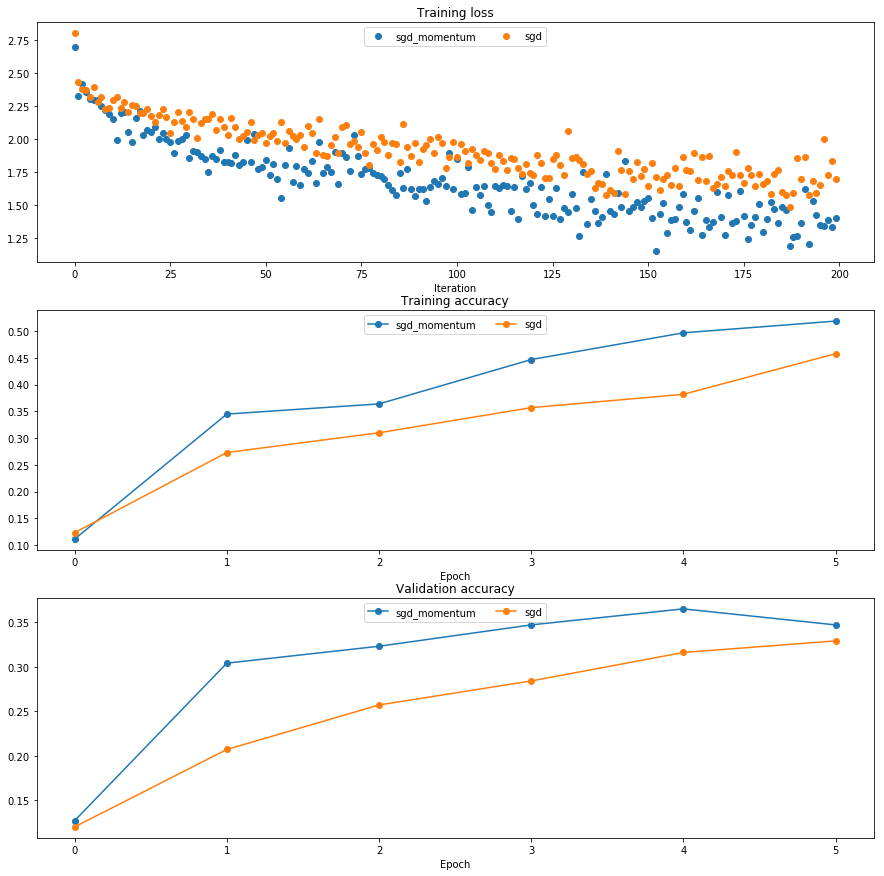

In [126]:
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in list(solvers.items()):
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, 'o', label=update_rule)
    
    plt.subplot(3, 1, 2)
    plt.plot(solver.train_acc_history, '-o', label=update_rule)
    
    plt.subplot(3, 1, 3)
    plt.plot(solver.val_acc_history, '-o', label=update_rule)
    
for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()
    

In [124]:
for update_rule, solver in list(solvers.items()):
    print (update_rule)
    print (solver)

sgd_momentum
sgd


### RMSProp and Adam

In [127]:
from cs231n.optim import adam

In [128]:
learning_rates = {'rmsprop': 1e-4, 'adam': 1e-3}
for update_rule in ['adam', 'rmsprop']:
    print('running with ', update_rule)
    model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)
    
    solver = Solver(model, small_data, num_epochs=5, batch_size = 100, update_rule=update_rule,
                   optim_config={
                       'learning_rate': learning_rates[update_rule]
                   },
                   verbose=True)
    solvers[update_rule] = solver
    solver.train()
    print()

running with  adam
(Iteration 1 / 200) loss: 2.415084
(Epoch 0 / 5) train acc: 0.144000; val_acc: 0.114000
(Iteration 11 / 200) loss: 2.112398
(Iteration 21 / 200) loss: 1.830914
(Iteration 31 / 200) loss: 1.821547
(Epoch 1 / 5) train acc: 0.380000; val_acc: 0.287000
(Iteration 41 / 200) loss: 1.834586
(Iteration 51 / 200) loss: 1.634281
(Iteration 61 / 200) loss: 1.632450
(Iteration 71 / 200) loss: 1.598875
(Epoch 2 / 5) train acc: 0.441000; val_acc: 0.339000
(Iteration 81 / 200) loss: 1.596098
(Iteration 91 / 200) loss: 1.403606
(Iteration 101 / 200) loss: 1.578476
(Iteration 111 / 200) loss: 1.474058
(Epoch 3 / 5) train acc: 0.522000; val_acc: 0.372000
(Iteration 121 / 200) loss: 1.345579
(Iteration 131 / 200) loss: 1.399974
(Iteration 141 / 200) loss: 1.498748
(Iteration 151 / 200) loss: 1.177701
(Epoch 4 / 5) train acc: 0.564000; val_acc: 0.358000
(Iteration 161 / 200) loss: 1.386567
(Iteration 171 / 200) loss: 1.188197
(Iteration 181 / 200) loss: 1.261810
(Iteration 191 / 200) lo

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


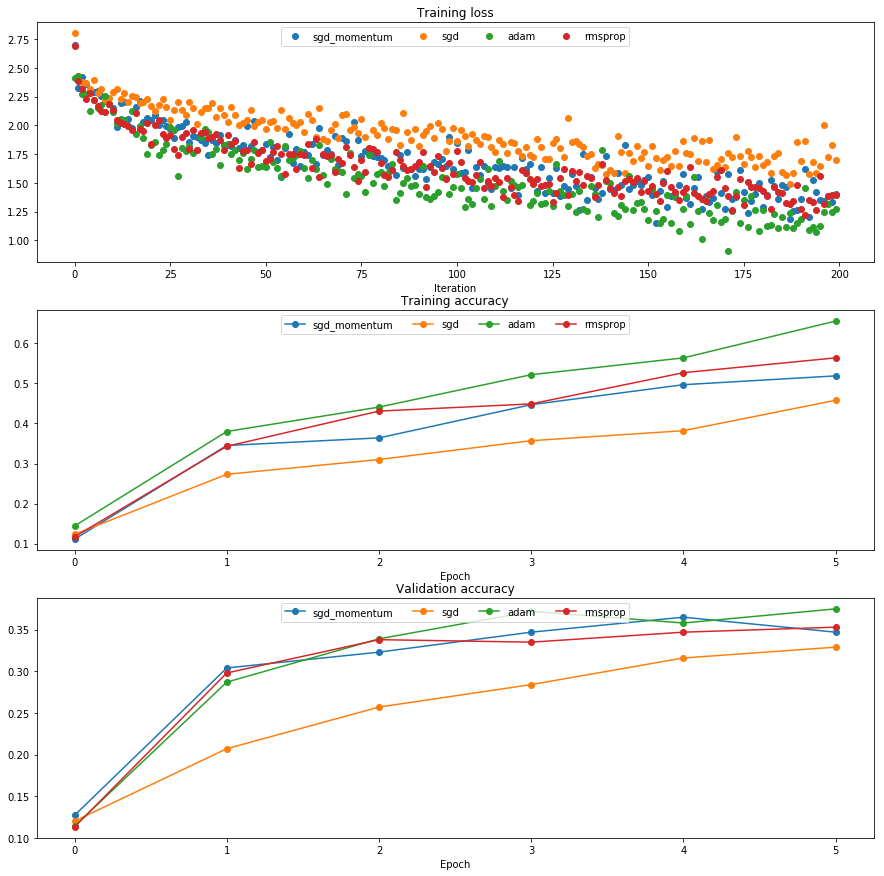

In [131]:
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in list(solvers.items()):
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, 'o', label=update_rule)

    plt.subplot(3, 1, 2)
    plt.plot(solver.train_acc_history, '-o', label=update_rule)

    plt.subplot(3, 1, 3)
    plt.plot(solver.val_acc_history, '-o', label=update_rule)

for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

### Test you model

In [134]:
best_model = FullyConnectedNet([100, 100, 100, 100, 100, 100], weight_scale=1e-5,
                             use_batchnorm=True, dropout=0.8)
solver = Solver(best_model, data, num_epochs=20,
               batch_size=50,
               update_rule='adam',
               optim_config={'learning_rate': 1e-4},
               verbose=False)


In [ ]:
solver.train()

## layer.py

In [16]:
from builtins import range
import numpy as np

In [17]:
def affine_forward(x, w, b):
    """
    Inputs:
        - x: A numpy array containing input data, of shape (X, d_1, ..., d_k)
        - w: A numpy array of weights, of shape (D, M)
        - b: A numpy array of biases, of shape (M, )
    Returns a tuple of:
        - out: output, of shape (N, M)
        - cache: (x, w, b)
    """
    out = None
    N = x.shape[0]
    out = x.reshape[N, -1].dot(w) + b
    
    cache = (x, w, b)
    return out, cache

In [18]:
def affine_backward(dout, cache):
    """
    Inputs:
        - dout: Upstream derivative, of shape (N, M)
        - cache: Tuple of:
            - x: Input data, of shape (N, d_1, ... d_k)
            - w: Weights, of shape (D, M)
            
    Returns a tuple of:
        - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
        - dw: Gradient with respect to w, of shape (D, M)
        - db: Gradient with respect to b, of shape (M, )
    
    """
    x, w, b = cache
    dx, dw, db = None, None, None
    
    N = x.shape[0]
    dx = dout.dot(w.T).reshape(x.shape)
    dw = x.reshape(N, -1).T.dot(dout)
    db = np.sum(dout, axis=0)
    
    return dx, dw, db

In [19]:
def relu_forward(x):
    """
    Input:
        - x: Inputs, of any shape
    
    Returns a tuple of:
        - out: Output, of the same shape as x
        - cache: x
    """
    out = None
    out = np.maximum(0, x)
    
    cache = x
    return out, cache
    

In [22]:
def relu_backward(dout, cache):
    dx, x = None , cache
    dx = dout
    dx[x<=0] = 0
    return dx

## fc_net.py

In [29]:
from builtins import range
from builtins import object
import numpy as np

from cs231n.layers import *
from cs231n.layer_utils import *

In [ ]:
class TwoLayerNet(object):
    """
    The architecure should be affine - relu - affine - softmax
    
    Note that this class does not implement gradient descent; instead, it will interact with a separate solver object that is responsible for running optimization
    
    """
    
    def __init__(self, input_dim=3*32*32, hidden_dim=100, num_classes=10, weight_scale=1e-3, reg=0.0):
        """
        Initialize a new network
        
        Inputs:
            - input_dim: An integer giving the size of the input
            - hidden_dim: An integer giving the size of the hidden layer
            - num_classes: An integer giving the number of classes to classify
            - dropout: Scalar between 0 and 1 giving dropout strength
            - weight_scale: Scalar giving the standard deviation for random initialization of the weights.
            - reg: Scalar giving L2 regularization strength
        """
        self.params = {}
        self.reg = reg
        
        # Initializa the weights and biases of the two-layer net. Weights
        self.params['W1'] = np.random.normal(0, weight_scale, [input_dim, hidden_dim])
        self.params['b1'] = np.zeros([hidden_dim])
        self.params['W2'] = np.random.normal(0, weight_scale, [hidden_dim, num_classes])
        self.params['b2'] = np.zeros([num_classes])

    def loss(self, X, y=None):
        """
        Compute loss and gradient for a minibatch of data
        
        Inputs:
            - X: Array of input data of shape (N, d_1, .., d_k)
            - y: Array of labels, of shape (N,). y[i] gives the label for X[i]
            
        Returns:
        
            If y is None, then run a test-time forward pass of the model and return
            - scores: Array of shape (N, C) giving classification scores, where scores[i, c] is the classification score for X[i] and class c
            
            If y is not None, then run a training-time forward and backward pass and return a tuple of:
            - loss: Scalar value giving the loss
            - grads: Dictionary with the same keys as self.params, mapping parameter names to gradients of the loss with respect to those parameters.
            
        """
        scores = None
        